# Clustering de series de tiempo por descomposición espectral
Por: Federico Salinas Samaniego

Carga de librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplcatppuccin

from sklearn.cluster import KMeans
from collections import Counter

from Rutinas_SpecDec import ClustTimeSD
from Metricas_Clusters import GetMetricsClustering, group_colors, mocha_cmap

mpl.style.use("mocha")
plt.rcParams.update({
    "text.usetex": True
})

Lectura de series de tiempo y sus clases asignadas

In [2]:
time_series = []
class_series = []

with open("../input data/StarLightCurves_sample.txt", "r") as input_sample_file:
    for line in input_sample_file.readlines():
        split_line = line.split(" ")
        series_sample = [float(value) for value in split_line[1:]]

        class_series.append(int(split_line[0]))
        time_series.append(series_sample)

class_series = np.array(class_series)
time_series = np.array(time_series)

In [3]:
SimilarityMatrix = np.load("../output data/DTW.npy")

ClustSpectral = ClustTimeSD(SimilarityMatrix, eps = 0.1, max_iters = 200, sig0 = 0.5, alpha = 0.1)
ClustSpectral.SolveForOptimalQ()

Optimal number of clusters = 3
Max iterations reached with G=(0.3662429890027752+0j)


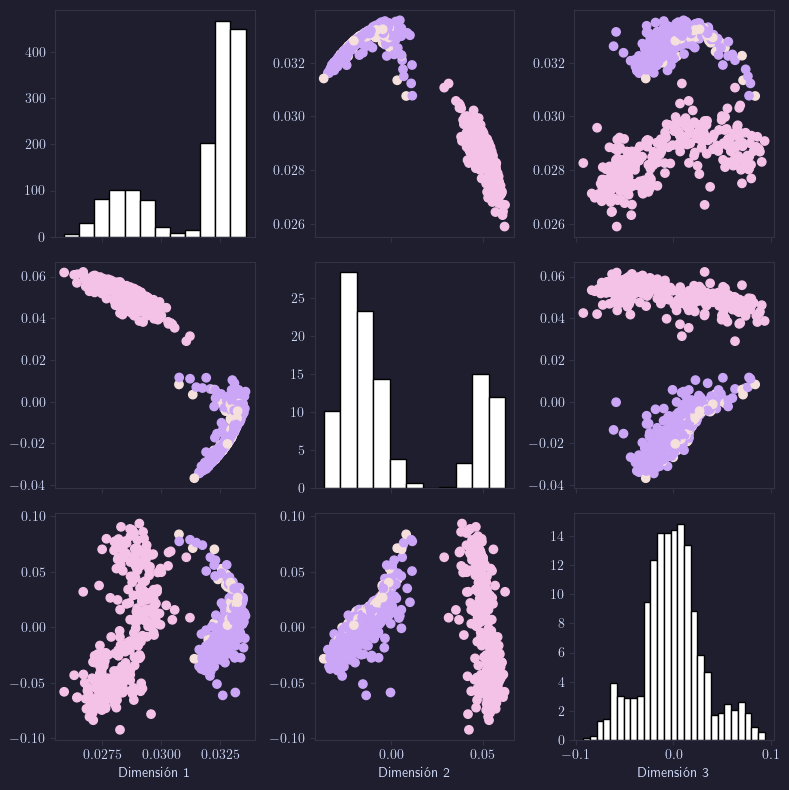

In [4]:
K = ClustSpectral.OptimalNumClusters
OptimalQ = ClustSpectral.FoundQ

Figure_Spec1, Subplots_Spec1 = plt.subplots(nrows = K, ncols = K, sharex = "col", figsize = (8, 8))

for n in range(K):
    Subplots_Spec1[n,n].hist(OptimalQ[:,n], facecolor = "white", edgecolor = "black", density = True, bins = "auto")
    for m in range(K):
        if n != m:
            Subplots_Spec1[n,m].scatter(OptimalQ[:,m], OptimalQ[:,n], c = class_series, cmap = mocha_cmap)
    Subplots_Spec1[2,n].set_xlabel(f"Dimensión {n + 1}")

Figure_Spec1.tight_layout()

In [5]:
Spectral_KMeans = KMeans(n_clusters = 3)
AssignedClusters = Spectral_KMeans.fit_predict(OptimalQ)

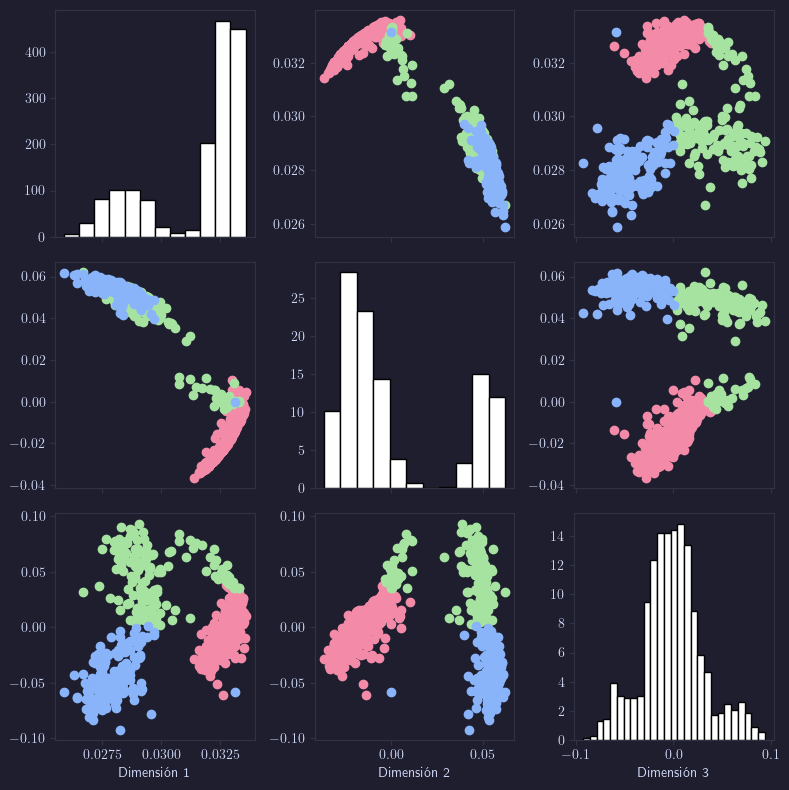

In [6]:
Figure_Spec2, Subplots_Spec2 = plt.subplots(nrows = K, ncols = K, sharex = "col", figsize = (8, 8))

for n in range(K):
    Subplots_Spec2[n,n].hist(OptimalQ[:,n], facecolor = "white", edgecolor = "black", density = True, bins = "auto")
    for m in range(K):
        if n != m:
            for class_num in set(AssignedClusters):
                class_num_mask = (AssignedClusters == class_num)
                Subplots_Spec2[n,m].scatter(OptimalQ[class_num_mask,m], OptimalQ[class_num_mask,n], c = group_colors[class_num + 1])

    Subplots_Spec2[2,n].set_xlabel(f"Dimensión {n + 1}")

Figure_Spec2.tight_layout()

In [7]:
cluster_counts = {k:Counter(class_series[AssignedClusters == k]) for k in range(3)}
cluster_counts

{0: Counter({3: 549, 1: 145}),
 1: Counter({2: 123, 3: 23, 1: 7}),
 2: Counter({2: 152, 3: 1})}

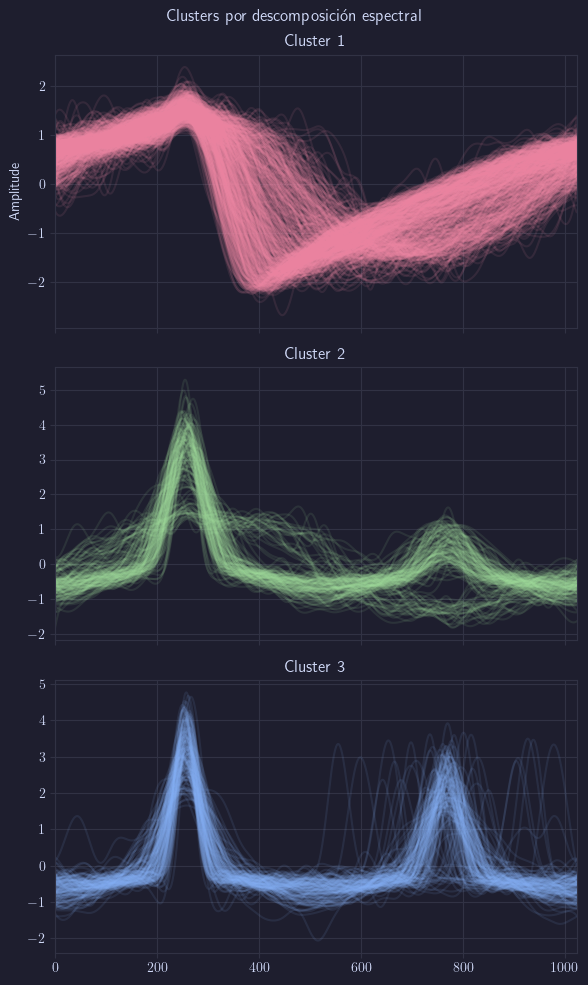

In [8]:
Figure, Subplot = plt.subplots(3, 1, sharex = "all", figsize=(6, 10))
Figure.suptitle("Clusters por descomposición espectral")

for class_data, time_series in zip(AssignedClusters, time_series):
    Subplot[class_data].plot(time_series, alpha = 0.1, color = group_colors[class_data + 1])
    Subplot[class_data].set_xlim(0, 1023)
    Subplot[class_data].grid(True)

Subplot[0].set_ylabel("Amplitude")
for k in range(1,4):
    Subplot[k-1].set_title(f"Cluster {k}")

Figure.tight_layout()

In [9]:
GetMetricsClustering(AssignedClusters, class_series, "Espectral")

,Rand,NMI
Espectral,0.766731,0.506705
